In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
#reading data from CSV
bike = pd.read_csv("bikeshare.csv")
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [74]:
features = ['temp']
X = bike[features]
X


,temp
0,9.84
1,9.02
2,9.02
3,9.84
4,9.84
...,...
10881,15.58
10882,14.76
10883,13.94
10884,13.94


In [75]:
#X = bike.iloc[:,5].values
#X


In [76]:
Y = bike['count']
Y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [77]:
#Y = bike.iloc[:,11].values
#Y

In [78]:
#sns.displot(bike['temp'], kde=False, bins=8)

In [79]:
#sns.countplot(y='temp', data=bike)

In [80]:
#sns.barplot(x='temp',y='count', data=bike)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=100)
    

In [82]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [83]:
predict = lr.predict(X_test)
predict

array([225.06587332, 141.84199609, 262.89490843, ..., 209.93425928,
       119.14457503, 156.97361014])

In [84]:
lr.coef_

array([9.22659393])

In [85]:
lr.intercept_

5.657469717784096

C:\Users\sabin\AppData\Roaming\Python\Python39\site-packages\sklearn\impute\_base.py:337: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(
C:\Users\sabin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


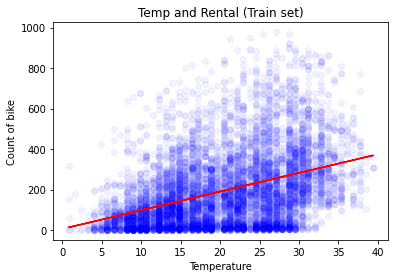

In [94]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(X_train)
X_train = imputer.transform(X_train)


plt.scatter(X_train, Y_train, color= 'blue',alpha=0.05)
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.title('Temp and Rental (Train set)')
plt.xlabel('Temperature')
plt.ylabel('Count of bike')
plt.show()

In [87]:
lr.predict([[25]])

C:\Users\sabin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([236.32231792])